In [28]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_sales = pd.read_csv('../data/desafio.csv')

In [3]:
df_sales.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-12,2016-06-12,processado,b76eb9b8fc0f17098812da9117d3e500
3,dee418152a36314b4aee6ce9cf94fcbf,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,176.2020,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,cancelado,2016-06-13,0000-00-00,captado,b76eb9b8fc0f17098812da9117d3e500
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,b76eb9b8fc0f17098812da9117d3e500


In [4]:
df_sales['revenue'] = df_sales['price'] - df_sales['liquid_cost']
df_sales['markup'] =  df_sales['revenue']/ df_sales['liquid_cost']  
df_sales['capture_date'] = pd.to_datetime(df_sales['capture_date'], errors='coerce')
df_sales['week_number'] = df_sales['capture_date'].dt.strftime('%W').astype(int)
df_sales['month'] = df_sales['capture_date'].dt.strftime('%m').astype(int)


In [5]:
df_sales.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel,revenue,markup,week_number,month
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500,436.1935,0.803737,23,6
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500,493.5835,0.909485,23,6
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-12,2016-06-12,processado,b76eb9b8fc0f17098812da9117d3e500,436.1935,0.803737,23,6
3,dee418152a36314b4aee6ce9cf94fcbf,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,176.2020,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,cancelado,2016-06-13,0000-00-00,captado,b76eb9b8fc0f17098812da9117d3e500,436.1935,0.803737,24,6
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,b76eb9b8fc0f17098812da9117d3e500,433.3435,0.798486,24,6


In [6]:
df_sales.describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999])

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,revenue,markup,week_number,month
count,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000,179149.000000
mean,1.055278,234.638585,19.525329,25.095547,17.872443,136.034906,98.603679,0.808745,25.425819,6.312254
std,0.597942,186.638919,17.402820,32.333226,28.125661,83.603243,143.344989,0.997411,16.042818,3.651735
min,1.000000,1.030000,0.000000,0.000000,0.000000,4.114100,-118.476500,-0.991381,0.000000,1.000000
0.01%,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,-4.614900,-0.024321,0.000000,1.000000
25%,1.000000,149.910000,10.640300,0.000000,0.000000,78.862100,55.293500,0.542692,11.000000,3.000000
50%,1.000000,194.400000,17.519500,21.492000,0.000000,117.082000,78.709000,0.693528,23.000000,6.000000
75%,1.000000,309.360000,28.157000,38.880000,30.403000,205.899700,114.044300,0.892731,41.000000,10.000000
90%,1.000000,359.948000,33.244500,61.092000,68.868820,213.438200,155.961800,1.104317,47.000000,11.000000
99%,2.000000,849.182000,72.015900,136.783800,110.798852,496.929700,432.890300,3.210035,52.000000,12.000000


* The majority of the orders have 1 unity of product 
* An order with 100 itens seems to be a huge outlier since it is too farway from the 99.99% percentile. 
* The tax_substituion == 0 indicates sales within the same icms range (state maybe), need checks
* I'm missing some geolocation indicators
* Pis/Cofins == 0 for basic meal itens; soaps; bucal higiene; toilet paper; some books (digital books?); etc.

## Removing some outliers to keep a better view of the data

In [7]:
df_sales = df_sales[df_sales.quantity <= 20]
df_sales.describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999])

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,revenue,markup,week_number,month
count,179132.000000,179132.000000,179132.000000,179132.000000,179132.000000,179132.000000,179132.000000,179132.000000,179132.000000,179132.000000
mean,1.051498,233.924636,19.470616,25.033077,17.872476,136.036464,97.888171,0.803014,25.426082,6.312317
std,0.411821,161.542792,15.544559,30.451995,28.125847,83.604370,108.859098,0.758131,16.042657,3.651713
min,1.000000,1.030000,0.000000,0.000000,0.000000,4.114100,-118.476500,-0.991381,0.000000,1.000000
0.01%,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,-4.614900,-0.024336,0.000000,1.000000
25%,1.000000,149.910000,10.637950,0.000000,0.000000,78.862100,55.293500,0.542692,11.000000,3.000000
50%,1.000000,194.400000,17.519500,21.492000,0.000000,117.082000,78.705850,0.693326,23.000000,6.000000
75%,1.000000,309.260000,28.157000,38.880000,30.403000,205.899700,114.044300,0.892731,41.000000,10.000000
90%,1.000000,359.910000,33.244500,61.092000,68.868300,213.438200,155.961800,1.104013,47.000000,11.000000
99%,2.000000,847.620800,71.723600,136.750050,110.844769,496.929700,431.673800,3.193174,52.000000,12.000000


Now not only the high sale value that was showing for one order has moved out but also the markup of 136% over the cost.

In [8]:
df_sales.to_csv('../data/clean_step1.csv', index=False)

## Verify the distributions

In [9]:
df_sales[['category', 'code']].nunique()

category     11
code        131
dtype: int64

In [10]:
def summary_dist(target_col, base_col='order_id', method='count'):
    if method == 'count':
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.nunique}).reset_index()
    else:
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.sum}).reset_index()
    df_summary[base_col] = df_summary[base_col] / df_summary[base_col].sum()  * 100
    return df_summary.sort_values(base_col)

In [11]:
summary_dist('order_status')

,order_status,order_id
4,cancelado não aprovado,0.001139
11,pendente processamento,0.002848
6,em rota de devolução,0.014240
16,suspenso barragem,0.017658
15,suspeita de fraude,0.017658
3,cancelado fraude confirmada,0.039873
10,fraude confirmada,0.091138
5,disponível para retirada.,0.119619
2,cancelado dados divergentes,0.376514
12,processado,0.494993


It is cool to perceive that 13% of the sales are cancelled

In [12]:
summary_dist('process_status')

,process_status,order_id
0,captado,13.8262
1,processado,86.1738


Maybe we should have to work with only the processed and delivered orders 

## Cleaning again

In [13]:
df_sales = df_sales[df_sales.order_status == 'entrega total']
df_sales.to_csv('../data/clean_step2.csv', index=False)

## Back to the distribution

In [14]:
df_orders_category = summary_dist('category')
df_orders_category

,category,order_id
1,4ece547755cba9e7fc14125bc895f31b,0.033059
2,568696c0b6828f77884ea8628fcc6200,0.034466
7,9cfa7aefcc61936b70aaec6729329eda,0.035873
10,f79dccaf0b890eced0724d8563948c4f,0.040797
8,d7ecf0071e88c21e993da125d2229a51,0.093551
3,61ad270def6d4b2403f4536f39cff29a,0.131535
5,98f679396a60f117b171ddedfcc3e5ed,0.173738
9,dda10a917a9ea3120e5d299af5105290,0.578189
4,90cc5bdd050bcd7cf0d50d079d0fda66,2.776293
6,9a97178a18aa6333aabdfb21de182b99,10.358871


* It is interesting to see that 85% of the orders are from 1 category 

In [15]:
df_products_category = summary_dist('category', base_col='code')
df_products_category

,category,code
2,568696c0b6828f77884ea8628fcc6200,0.769231
3,61ad270def6d4b2403f4536f39cff29a,0.769231
7,9cfa7aefcc61936b70aaec6729329eda,0.769231
8,d7ecf0071e88c21e993da125d2229a51,0.769231
1,4ece547755cba9e7fc14125bc895f31b,1.538462
6,9a97178a18aa6333aabdfb21de182b99,1.538462
9,dda10a917a9ea3120e5d299af5105290,1.538462
5,98f679396a60f117b171ddedfcc3e5ed,2.307692
10,f79dccaf0b890eced0724d8563948c4f,2.307692
4,90cc5bdd050bcd7cf0d50d079d0fda66,6.153846


* It is interesting to see that 80% of the products are from 1 category, the same wich holds 85% of the sales
* The category with 1.52% of the products corresponds to 10% of the sales.
* I'm missing a category description

In [16]:
df_products_category_quantity = summary_dist('category', base_col='quantity', method='sum')
df_products_category_quantity

,category,quantity
1,4ece547755cba9e7fc14125bc895f31b,0.030908
2,568696c0b6828f77884ea8628fcc6200,0.032224
7,9cfa7aefcc61936b70aaec6729329eda,0.037485
10,f79dccaf0b890eced0724d8563948c4f,0.039458
8,d7ecf0071e88c21e993da125d2229a51,0.087464
3,61ad270def6d4b2403f4536f39cff29a,0.124949
5,98f679396a60f117b171ddedfcc3e5ed,0.182163
9,dda10a917a9ea3120e5d299af5105290,0.747064
4,90cc5bdd050bcd7cf0d50d079d0fda66,2.848838
6,9a97178a18aa6333aabdfb21de182b99,10.505583


It seems that the quantity of products follows the amount of orders and the top 3 categories are the same.

In [17]:
df_products_category_revenue = summary_dist('category', base_col='revenue', method='sum')
df_products_category_revenue

,category,revenue
8,d7ecf0071e88c21e993da125d2229a51,0.003374
10,f79dccaf0b890eced0724d8563948c4f,0.010626
7,9cfa7aefcc61936b70aaec6729329eda,0.011851
3,61ad270def6d4b2403f4536f39cff29a,0.018057
1,4ece547755cba9e7fc14125bc895f31b,0.119925
2,568696c0b6828f77884ea8628fcc6200,0.125734
5,98f679396a60f117b171ddedfcc3e5ed,0.158349
9,dda10a917a9ea3120e5d299af5105290,1.311414
4,90cc5bdd050bcd7cf0d50d079d0fda66,5.925647
6,9a97178a18aa6333aabdfb21de182b99,9.045888


The ranking shfits a bit bringing the category, when the 90c category gets a higher share on revenue with a lower percentage of the quantity of sales. 

## Deep dive on the categories

In [18]:
top_4_cats_orders = df_orders_category.tail(4).category.values
top_4_cats_product_revenue = df_products_category_revenue.tail(4).category.values
top_4_cats_product_quantity = df_products_category_quantity.tail(4).category.values

selected_cats = list(set(list(top_4_cats_orders)+ list(top_4_cats_product_quantity)+ list(top_4_cats_product_revenue)))
selected_cats

['dda10a917a9ea3120e5d299af5105290',
 '90cc5bdd050bcd7cf0d50d079d0fda66',
 '9a97178a18aa6333aabdfb21de182b99',
 '388128822cef4b4f102ae881e040a64b']

In [19]:
df_filtered_sales = df_sales[df_sales.category.isin(selected_cats)]
df_filtered_sales.groupby('category').describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999]).T

category                 388128822cef4b4f102ae881e040a64b  \
quantity         count                      124460.000000   
                 mean                            1.042954   
                 std                             0.364508   
                 min                             1.000000   
                 0.01%                           1.000000   
                 25%                             1.000000   
                 50%                             1.000000   
                 75%                             1.000000   
                 90%                             1.000000   
                 99%                             2.000000   
                 99.99%                         14.554100   
                 max                            20.000000   
price            count                      124460.000000   
                 mean                          225.198874   
                 std                           130.029934   
                 min                            34.840000   
                 0.01%                          36.953377   
                 25%                           139.400000   
                 50%                           199.400000   
                 75%                           314.400000   
                 90%                           359.400000   
                 99%                           539.890000   
                 99.99%                       3098.574919   
                 max                          7774.390000   
pis_cofins       count                      124460.000000   
                 mean                           20.769859   
                 std                            12.015697   
                 min                             0.000000   
                 0.01%                           0.000000   
                 25%                            12.894500   
                 50%                            18.444500   
                 75%                            29.082000   
                 90%                            33.244500   
                 99%                            49.939800   
                 99.99%                        286.618219   
                 max                           719.131100   
icms             count                      124460.000000   
                 mean                           23.312730   
                 std                            26.674123   
                 min                             0.000000   
                 0.01%                           0.000000   
                 25%                             0.000000   
                 50%                            16.864050   
                 75%                            40.483800   
                 90%                            61.092000   
                 99%                            87.432138   
                 99.99%                        382.383919   
                 max                          1220.400000   
tax_substitution count                      124460.000000   
                 mean                           17.760340   
                 std                            25.433148   
                 min                             0.000000   
                 0.01%                           0.000000   
                 25%                             0.000000   
                 50%                             0.000000   
                 75%                            30.199600   
                 90%                            69.756500   
                 99%                            76.523500   
                 99.99%                        158.277100   
                 max                           158.612400   
liquid_cost      count                      124460.000000   
                 mean                          130.535761   
                 std                            67.703759   
                 min                            27.284700   
                 0.01%             

Those 4 categories respond for almost all sales in the dataset, the distributions are very similar to the whole dataset itself.
* The category 9a97178a18aa6333aabdfb21de182b99 doens't have to pay pis/cofins
* the Category f79dccaf0b890eced0724d8563948c4f doens't have much orders 73 and have the lower prices on of the 4 including its costs with a low deviation.
* For the category 388128822cef4b4f102ae881e040a64b the price and cost deviation appear more Stable given the distribution percentiles, max, mean and deviations. Is that a price sentive one?
* Why the category dda as a zero tax substitution of its sales? 

In [20]:
df_product_cat_orders = pd.crosstab(
    df_filtered_sales.code, df_filtered_sales.category, margins=True, 
    values=df_filtered_sales.quantity, aggfunc=pd.Series.sum
).reset_index().sort_values('All')
df_product_cat_orders

category,code,388128822cef4b4f102ae881e040a64b,90cc5bdd050bcd7cf0d50d079d0fda66,9a97178a18aa6333aabdfb21de182b99,dda10a917a9ea3120e5d299af5105290,All
89,b3fca69c356bec270dc3a90f8b498883,NaN,NaN,NaN,2.0,2
77,8e5d2c3f2476cb5c507dd0f00f6eabda,NaN,45.0,NaN,NaN,45
95,c27a276b623c751a6b0a8ad6243d681d,46.0,NaN,NaN,NaN,46
38,411e1404e183718207628232e91ce5a9,NaN,74.0,NaN,NaN,74
57,5bcebbc4f704cffaf2e6ccaf1d1fb5c7,74.0,NaN,NaN,NaN,74
82,a36f5dfa4f08cdfe64594061ba76f30e,77.0,NaN,NaN,NaN,77
102,ce4baabfbcb1d43e22f7ba44b49f2714,88.0,NaN,NaN,NaN,88
84,a7772a34be22f0fd09f0ef36b6eb337f,115.0,NaN,NaN,NaN,115
111,e6017ce062eb324ab446e9983afba369,126.0,NaN,NaN,NaN,126
107,d709ff164dc53eb7b8470e84c2b60974,128.0,NaN,NaN,NaN,128


In [21]:
df_product_cat_orders.notna().sum(axis = 0)


category
code                                119
388128822cef4b4f102ae881e040a64b    107
90cc5bdd050bcd7cf0d50d079d0fda66      9
9a97178a18aa6333aabdfb21de182b99      3
dda10a917a9ea3120e5d299af5105290      3
All                                 119
dtype: int64

 * The category 388, not only is the highest in sales by fart but contains much of the variety of products. 
 Although the category 9a9 has the sconde most sold product.
 * The proucts 4534ea61b50410b3b6243e02b40c8cd1 and 7e3713530b46887cff58a2e2ac433ac5 bug me a bit. 

In [22]:
df_product_cat_orders = pd.crosstab(
    df_filtered_sales.code, df_filtered_sales.category, margins=True, 
    values=df_filtered_sales.revenue, aggfunc=pd.Series.sum
).reset_index().sort_values('All')
df_product_cat_orders

category,code,388128822cef4b4f102ae881e040a64b,90cc5bdd050bcd7cf0d50d079d0fda66,9a97178a18aa6333aabdfb21de182b99,dda10a917a9ea3120e5d299af5105290,All
89,b3fca69c356bec270dc3a90f8b498883,NaN,NaN,NaN,460.8096,4.608096e+02
95,c27a276b623c751a6b0a8ad6243d681d,2.525303e+03,NaN,NaN,NaN,2.525303e+03
57,5bcebbc4f704cffaf2e6ccaf1d1fb5c7,3.387335e+03,NaN,NaN,NaN,3.387335e+03
111,e6017ce062eb324ab446e9983afba369,5.591740e+03,NaN,NaN,NaN,5.591740e+03
107,d709ff164dc53eb7b8470e84c2b60974,5.688013e+03,NaN,NaN,NaN,5.688013e+03
82,a36f5dfa4f08cdfe64594061ba76f30e,6.012060e+03,NaN,NaN,NaN,6.012060e+03
63,60424117a2618c7184687046fa5693c4,7.635591e+03,NaN,NaN,NaN,7.635591e+03
16,213005fe5d815c539812614f1f6a7768,9.223530e+03,NaN,NaN,NaN,9.223530e+03
15,1f12f1e1b9e7a20d4ad9dd549ec072c0,9.390578e+03,NaN,NaN,NaN,9.390578e+03
30,390943ce05959ac98c702d250c2ebb54,9.766926e+03,NaN,NaN,NaN,9.766926e+03


In [23]:
df_product_cat_orders.notna().sum(axis = 0)


category
code                                119
388128822cef4b4f102ae881e040a64b    107
90cc5bdd050bcd7cf0d50d079d0fda66      9
9a97178a18aa6333aabdfb21de182b99      3
dda10a917a9ea3120e5d299af5105290      3
All                                 119
dtype: int64

* Not only the product 7e3713530b46887cff58a2e2ac433ac5 bugs me but it has a high revenue standing on the top the rank of this categories.

# Season movement 

In [48]:
def plot_season_sales(df, target_col, base_col='month'):
    df = df[[base_col, target_col]].groupby(base_col).sum().reset_index()
    return sns.lineplot(x=df[base_col], y=df[target_col])


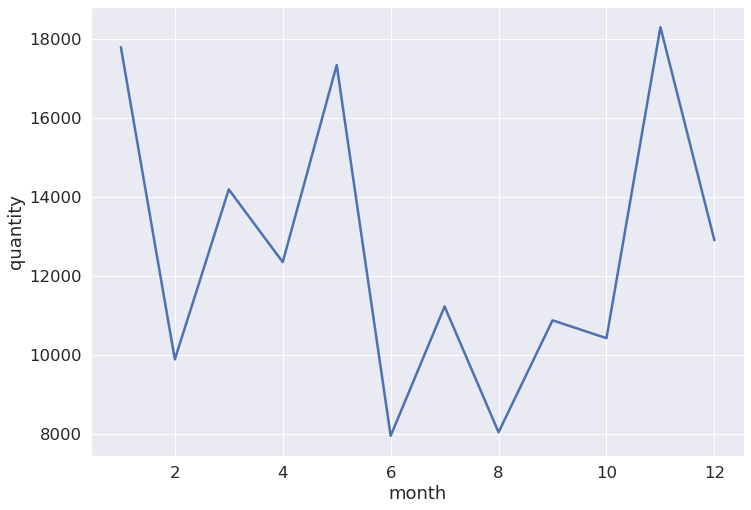

In [49]:
ax = plot_season_sales(df_filtered_sales,'quantity')
plt.show()

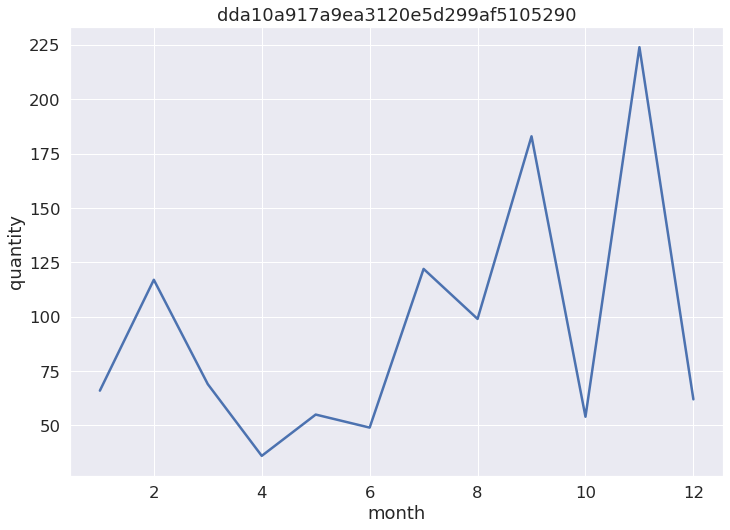

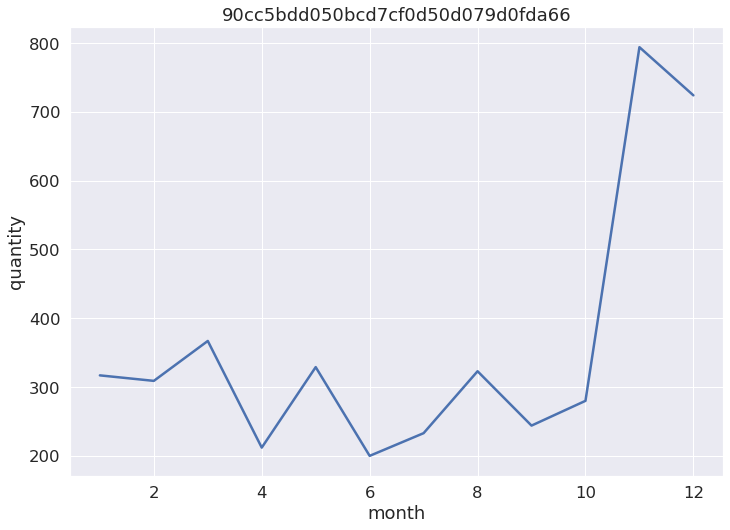

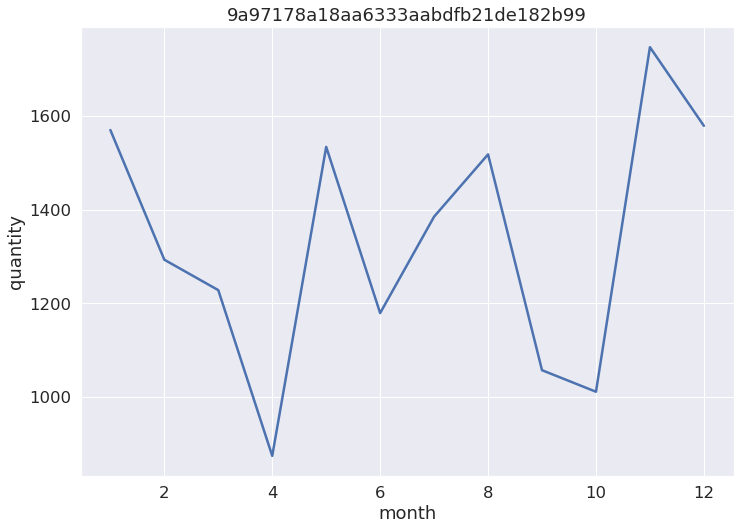

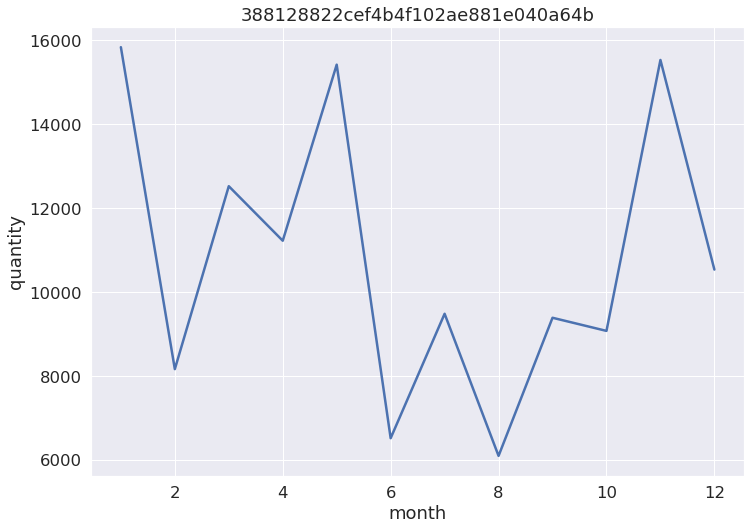

In [50]:
for cat in selected_cats: 
    df = df_filtered_sales[df_filtered_sales.category == cat]
    ax = plot_season_sales(df,'quantity')
    ax.set_title(cat)
    plt.show()

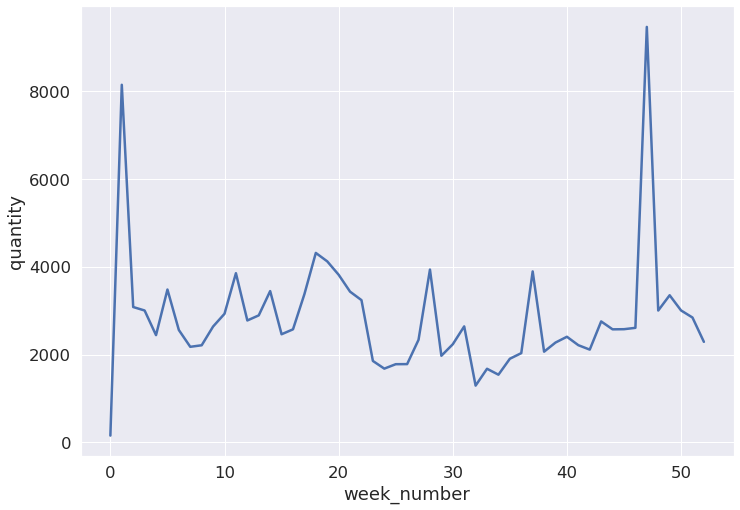

In [51]:
ax = plot_season_sales(df_filtered_sales,'quantity', base_col='week_number')
plt.show()

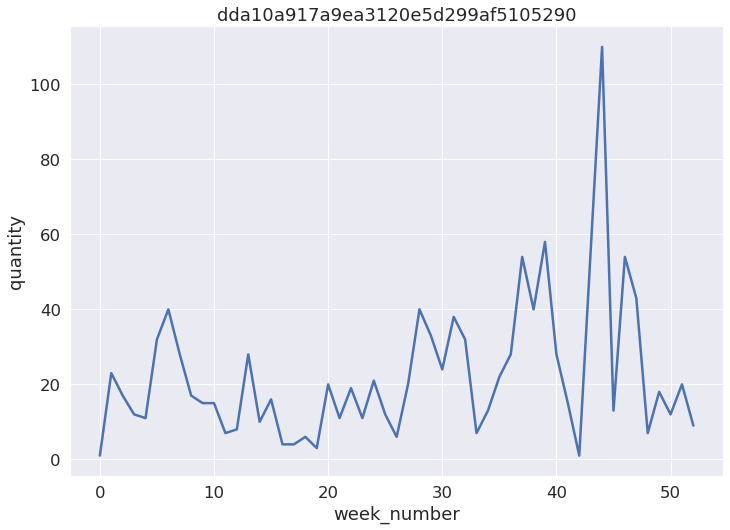

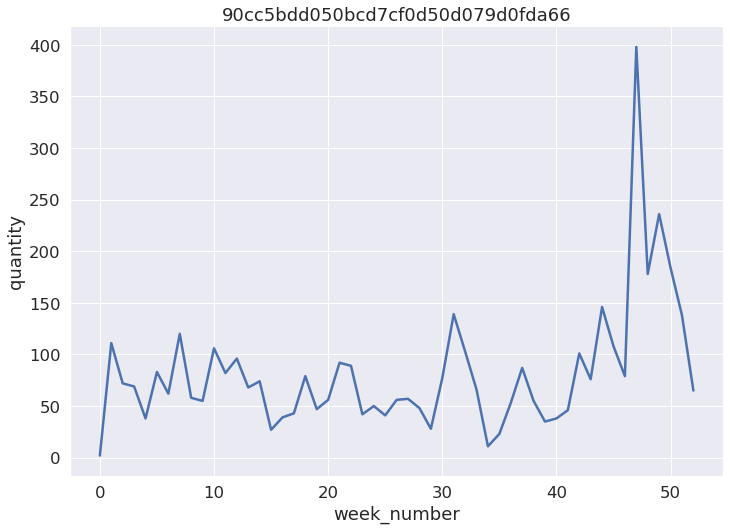

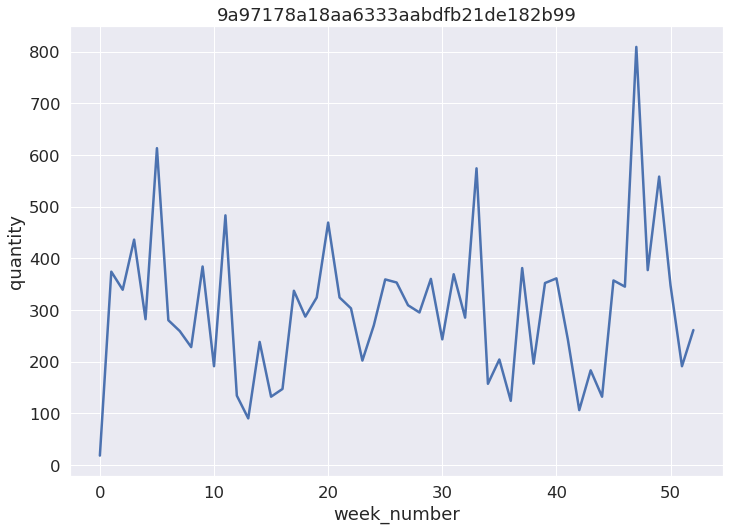

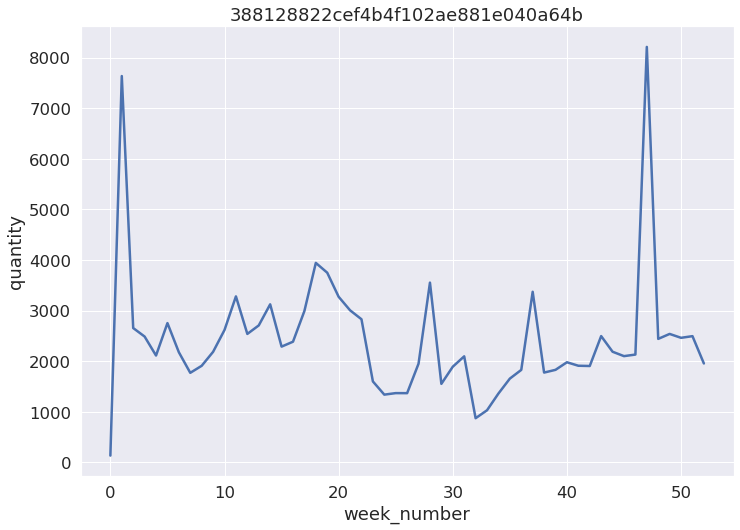

In [52]:
for cat in selected_cats: 
    df = df_filtered_sales[df_filtered_sales.category == cat]
    ax = plot_season_sales(df,'quantity', base_col='week_number')
    ax.set_title(cat)
    plt.show()